Optimal threshold based on F1 score: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



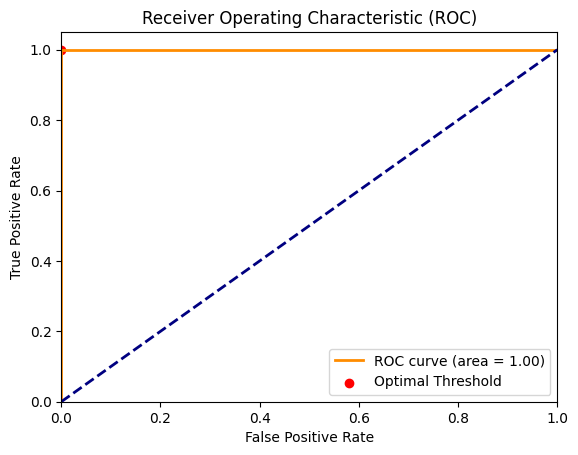

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, f1_score, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# For binary classification, we will use only class 0 and class 1
binary_mask = y < 2
X_binary = X[binary_mask]
y_binary = y[binary_mask]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs for different thresholds
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes F1 score
optimal_threshold = thresholds_pr[np.argmax(f1_scores)]
print(f'Optimal threshold based on F1 score: {optimal_threshold}')

# Predict using the optimal threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Calculate and print the new performance metrics
print(f'F1 Score: {f1_score(y_test, y_pred_optimal)}')
print('Classification Report:')
print(classification_report(y_test, y_pred_optimal))

# Plot ROC curve with the optimal threshold marked
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([fpr[np.argmax(f1_scores)]], [tpr[np.argmax(f1_scores)]], marker='o', color='red', label='Optimal Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Optimal threshold based on Recall: 0.0
Recall: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.43      1.00      0.60        13

    accuracy                           0.43        30
   macro avg       0.22      0.50      0.30        30
weighted avg       0.19      0.43      0.26        30



/opt/anaconda3/envs/tensor/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tensor/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tensor/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


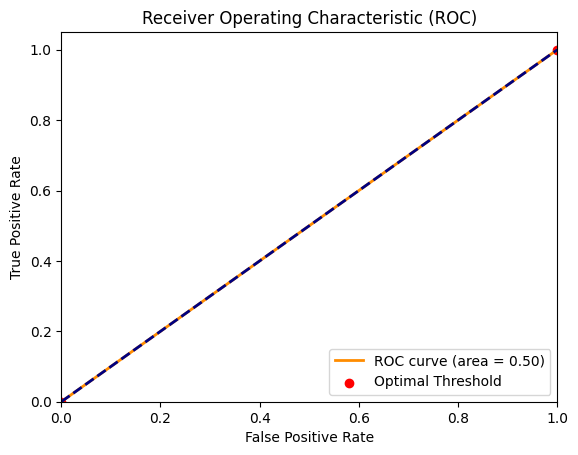

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, recall_score, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# For binary classification, we will use only class 0 and class 1
binary_mask = y < 2
X_binary = X[binary_mask]
y_binary = y[binary_mask]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_TRAIN, y_train)

# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs for different thresholds
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)

# Find the threshold that maximizes recall
optimal_threshold = thresholds_pr[np.argmax(recall)]
print(f'Optimal threshold based on Recall: {optimal_threshold}')

# Predict using the optimal threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Calculate and print the new performance metrics
print(f'Recall: {recall_score(y_test, y_probs)}')
print('Classification Report:')
print(classification_report(y_test, y_pred_optimal))

# Plot ROC curve with the optimal threshold marked
fpr, tpr, thresholds = roc_curve(y_test, y_pred_optimal)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.scatter([fpr[np.argmax(recall)]], [tpr[np.argmax(recall)]], marker='o', color='red', label='Optimal Threshold')
plt.scatter(fpr, tpr, marker='o', color='red', label='Optimal Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [5]:
def excel_column_to_number(column_label: str) -> int:
    number = 0
    for char in column_label:
        number = number * 26 + (ord(char) - ord('A') + 1)
    return number

# Reading input from the user
column_label = input().strip()
print(excel_column_to_number(column_label))


In [ ]:
def min_flips_to_xor(P, Q, R):
    flips = 0
    # While there's something left in P, Q, or R
    while P > 0 or Q > 0 or R > 0:
        # Extract the least significant bits
        P_bit = P & 1
        Q_bit = Q & 1
        R_bit = R & 1
        
        # Check if the current bits of P and Q need to be flipped
        if (P_bit ^ Q_bit) != R_bit:
            if R_bit == 1:
                flips += 1  # Both P_bit and Q_bit must be flipped to get R_bit = 1
            else:
                flips += P_bit + Q_bit  # At least one of P_bit or Q_bit must be flipped to get R_bit = 0
        
        # Shift right to process the next bit
        P >>= 1
        Q >>= 1
        R >>= 1
    
    return flips

# Read inputs
P = int(input().strip())
Q = int(input().strip())
R = int(input().strip())

# Calculate and print the result
print(min_flips_to_xor(P, Q, R))
